# Netlist

> SAX Netlist Models

The best introduction to SAX netlists for a sample GDSFactory component.

In [2]:
import os, sys; sys.stderr = open(os.devnull, "w")

In [3]:
import re
from enum import Enum
from functools import partial
from typing import Any, Callable, Dict, Optional, Union

import black
from pydantic import BaseModel as _BaseModel
from pydantic import Extra, Field, ValidationError, validator
from sax.utils import clean_string, get_settings, hash_dict

In [4]:
class BaseModel(_BaseModel):
    class Config:
        extra = Extra.ignore
        allow_mutation = False
        frozen = True

    def __repr__(self):
        s = super().__repr__()
        s = black.format_str(s, mode=black.Mode())
        return s

    def __str__(self):
        return self.__repr__()

    def __hash__(self):
        return hash_dict(self.dict())

The models were generated as follows:

In [5]:
import io
import json
from contextlib import redirect_stdout
from urllib.request import urlopen

import datamodel_code_generator as dcg

NETLIST_SCHEMA_URL = "https://raw.githubusercontent.com/gdsfactory/gdsfactory/master/gdsfactory/tests/schemas/netlist.json"


def download_schema(url=NETLIST_SCHEMA_URL):
    response = urlopen(url)
    json_text = response.read().decode()
    schema_dict = json.loads(json_text)
    return schema_dict


def generate_models():
    schema_dict = download_schema()
    json_text = json.dumps(schema_dict)
    buf = io.StringIO()
    with redirect_stdout(buf):
        dcg.generate(input_=json_text)
    content = buf.getvalue()
    content = content.replace(
        "extra = Extra.forbid",
        (
            "extra = Extra.ignore\n"
            "        allow_mutation = False\n"
            "        frozen = True"
        ),
    )
    content = (
        content.replace("ComponentModel", "Component")
        .replace("PlacemetModel", "Placement")
        .replace("RouteModel", "Route")
        .replace("NetlistModel", "Netlist")
        .replace("PlacementModel", "Placement")
    )
    return content


print(generate_models())

# generated by datamodel-codegen:
#   filename:  <stdin>
#   timestamp: 2022-08-17T03:21:43+00:00

from __future__ import annotations

from enum import Enum
from typing import Any, Dict, Optional, Union

from pydantic import BaseModel, Extra, Field


class Component(BaseModel):
    class Config:
        extra = Extra.ignore
        allow_mutation = False
        frozen = True

    component: Union[str, Dict[str, Any]] = Field(..., title='Component')
    settings: Optional[Dict[str, Any]] = Field(None, title='Settings')


class PortEnum(Enum):
    ce = 'ce'
    cw = 'cw'
    nc = 'nc'
    ne = 'ne'
    nw = 'nw'
    sc = 'sc'
    se = 'se'
    sw = 'sw'
    center = 'center'
    cc = 'cc'


class Placement(BaseModel):
    class Config:
        extra = Extra.ignore
        allow_mutation = False
        frozen = True

    x: Optional[Union[str, float]] = Field(0, title='X')
    y: Optional[Union[str, float]] = Field(0, title='Y')
    xmin: Optional[Union[str, float]] = Field(None, title=

This was autogenerated from the gdsfactory netlist json spec. Only a few validators were added and a few irrelevant fields were disabled.

In [6]:

class Component(BaseModel):
    class Config:
        extra = Extra.ignore
        allow_mutation = False
        frozen = True

    component: Union[str, Dict[str, Any]] = Field(..., title="Component")
    settings: Optional[Dict[str, Any]] = Field(None, title="Settings")

    # this was added:
    @validator("component")
    def validate_component_name(cls, value):
        if "," in value:
            raise ValueError(
                f"Invalid component string. Should not contain ','. Got: {value}"
            )
        return clean_string(value)
    

class PortEnum(Enum):
    ce = "ce"
    cw = "cw"
    nc = "nc"
    ne = "ne"
    nw = "nw"
    sc = "sc"
    se = "se"
    sw = "sw"
    center = "center"
    cc = "cc"


class Placement(BaseModel):
    class Config:
        extra = Extra.ignore
        allow_mutation = False
        frozen = True

    x: Optional[Union[str, float]] = Field(0, title="X")
    y: Optional[Union[str, float]] = Field(0, title="Y")
    xmin: Optional[Union[str, float]] = Field(None, title="Xmin")
    ymin: Optional[Union[str, float]] = Field(None, title="Ymin")
    xmax: Optional[Union[str, float]] = Field(None, title="Xmax")
    ymax: Optional[Union[str, float]] = Field(None, title="Ymax")
    dx: Optional[float] = Field(0, title="Dx")
    dy: Optional[float] = Field(0, title="Dy")
    port: Optional[Union[str, PortEnum]] = Field(None, title="Port")
    rotation: Optional[int] = Field(0, title="Rotation")
    mirror: Optional[bool] = Field(False, title="Mirror")


class Route(BaseModel):
    class Config:
        extra = Extra.ignore
        allow_mutation = False
        frozen = True

    links: Dict[str, str] = Field(..., title="Links")
    settings: Optional[Dict[str, Any]] = Field(None, title="Settings")
    routing_strategy: Optional[str] = Field(None, title="Routing Strategy")


class Netlist(BaseModel):
    class Config:
        extra = Extra.ignore
        allow_mutation = False
        frozen = True

    instances: Dict[str, Component] = Field(..., title="Instances")
    connections: Optional[Dict[str, str]] = Field(None, title="Connections")
    ports: Optional[Dict[str, str]] = Field(None, title="Ports")
    placements: Optional[Dict[str, Placement]] = Field(None, title="Placements")

    # these were removed (irrelevant for SAX):

    # routes: Optional[Dict[str, Route]] = Field(None, title='Routes')
    # name: Optional[str] = Field(None, title='Name')
    # info: Optional[Dict[str, Any]] = Field(None, title='Info')
    # settings: Optional[Dict[str, Any]] = Field(None, title='Settings')
    # pdk: Optional[str] = Field(None, title='Pdk')

    # these are extra additions:

    @validator("instances", pre=True)
    def coerce_different_type_instance_into_component_model(cls, instances):
        new_instances = {}
        for k, v in instances.items():
            if isinstance(v, str):
                v = {
                    "component": v,
                    "settings": {},
                }
            new_instances[k] = v
                
        return new_instances
    
    @staticmethod
    def clean_instance_string(value):
        if "," in value:
            raise ValueError(
                f"Invalid instance string. Should not contain ','. Got: {value}"
            )
        return clean_string(value)

    @validator("instances")
    def validate_instance_names(cls, instances):
        return {cls.clean_instance_string(k): v for k, v in instances.items()}

    @classmethod
    def clean_connection_string(cls, value):
        *comp, port = value.split(",")
        comp = cls.clean_instance_string(",".join(comp))
        return f"{comp},{port}"

    @validator("connections")
    def validate_connection_names(cls, instances):
        return {
            cls.clean_connection_string(k): cls.clean_connection_string(v)
            for k, v in instances.items()
        }

We add an additional model to represent recursive netlists:

In [7]:
    
class RecursiveNetlist(BaseModel):
    class Config:
        extra = Extra.ignore
        allow_mutation = False
        frozen = True
        
    __root__: Dict[str, Netlist]

Let's create a simple recursive netlist with gdsfactory.

:::{note}
We are using gdsfactory to create our netlist because it allows us to see the circuit we want to simulate and because we're striving to have a compatible netlist implementation in SAX.

However... gdsfactory is not a dependency of SAX. You can also define your circuits by hand (see [SAX Quick Start](../examples/01_quick_start.ipynb) or you can use another tool to programmatically construct your netlists.
:::

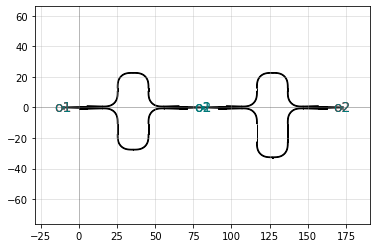

twomzi: uid 0, ports ['o1', 'o2'], aliases [], 0 polygons, 2 references

In [8]:
import gdsfactory as gf
from gdsfactory.components import mzi
from gdsfactory.get_netlist import get_netlist_recursive, get_netlist_dict
from IPython.display import display

@gf.cell
def twomzi():
    c = gf.Component()
    
    # instances
    mzi1 = mzi(delta_length=10)
    mzi2 = mzi(delta_length=20)
    
    # references
    mzi1_ = (c << mzi1)
    mzi2_ = (c << mzi2)
    
    # connections
    mzi2_.connect('o1', mzi1_.ports['o2'])
    
    # ports
    c.add_port('o1', port=mzi1_.ports['o1'])
    c.add_port('o2', port=mzi2_.ports['o2'])
    return c

comp  = twomzi()
display(comp)
recnet = RecursiveNetlist.parse_obj(get_netlist_recursive(comp, get_netlist_func=partial(get_netlist_dict, full_settings=True)))
flatnet = recnet.__root__['mzi_delta_length10']

Which gives the recursive netlist (go on to [Circuit](08_circuit.ipynb) from here.):

:::{eval-rst}
.. autofunction:: sax.netlist.netlist
:::


In [9]:

def netlist(dic: Dict) -> RecursiveNetlist:
    if isinstance(dic, RecursiveNetlist):
        return dic
    elif isinstance(dic, Netlist):
        dic = dic.dict()
    try:
        flat_net = Netlist.parse_obj(dic)
        net = RecursiveNetlist.parse_obj({'top_level': flat_net})
    except ValidationError:
        net = RecursiveNetlist.parse_obj(dic)
    return net
    